In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

###1번 : 데이터 적재

scikit-learn 라이브러리에서 기본으로 제공하는 Breast Cancer Wisconsin dataset를 pandas DataFrame으로 호출 

In [14]:
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y=True, as_frame=True)

In [15]:
X

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### 2번 : 데이터 전처리

- 결측치가 있는지 확인하시고, 있다면 결측치를 처리 

#### 1) 결측치 : column 별 평균값으로 대체

    X.fillna(X.mean())

#### 2) 결측치 : 직전 행 값으로 대체

    X.fillna(method='ffill')

#### 3) 결측치 : 바로 다음 행 값으로 대체

    X.fillna(method='bfill')

#### 4) 결측치 : 삭제

    X.dropna(axis=0)



In [23]:
X[X.isnull().any(axis=1)] # 결측지 없음

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension


### 3번 : 데이터 특징 파악

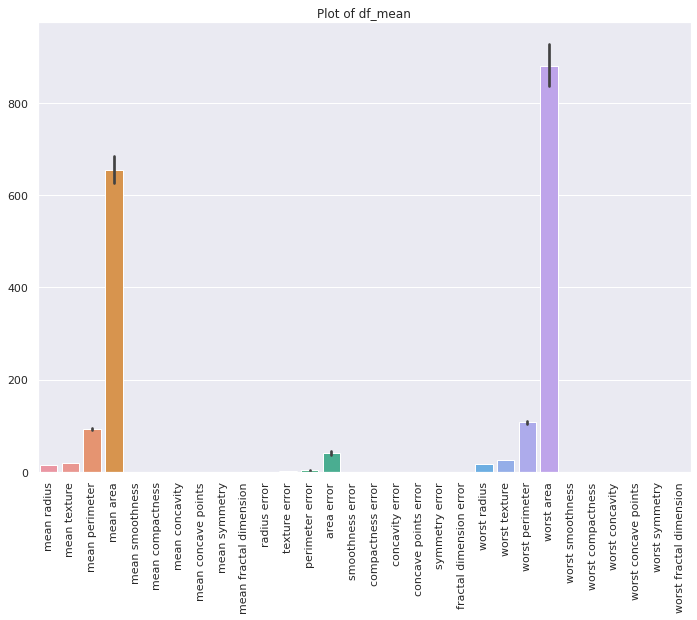

In [28]:
plt.title('Plot of df_mean')
sns.set(rc={'figure.figsize':(14,10)})
plt.xticks(rotation=90,fontsize=11)
sns.barplot(data = X)

### 4번 : 데이터 분할

- 분류 모델 학습을 위해 해당 데이터를 train data와 test data로 나누는 코드

- 일반적으로 train data와 test data의 비율로 80:20나 70:30을 가장 많이 사용.

- 꼭 두 가지 중 하나를 사용해야 하는 것은 아니며 상황에 따라 유동적임. 

- scikit-learn에서는 기본적으로 75 : 25를 사용한다.

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print('분리 전 shape : ', X.shape)
print('X_train의 shape : ', X_train.shape)
print('X_test의 shape : ',X_test.shape)

분리 전 shape :  (569, 30)
X_train의 shape :  (426, 30)
X_test의 shape :  (143, 30)


### 5번 : Decision Tree Classifier
- Breast Cancer 데이터 셋을 Decision Tree 모델을 이용하여 분류하는 코드를 작성 및 정확도를 출력

In [40]:
# Decision Tree 불러오기
from sklearn.tree import DecisionTreeClassifier

# Decision Tree 분류기 불러오기
clf = DecisionTreeClassifier(random_state=0)

# Decision Tree 학습을 위해 parameter 채우기
clf.fit(X_train, y_train)

# Decision Tree 테스트를 위해 parameter 채우기
pred = clf.predict(X_test)

# accuracy 계산
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred)

print("Accuracy : %.3f" % acc)

Accuracy : 0.881


### 6번 : Random Forest Classifier
- Random Forest 모델을 이용하여 분류하는 코드를 작성하고 정확도를 출력하는 코드를 작성


In [41]:
# Random Forest 불러오기
from sklearn.ensemble import RandomForestClassifier

# Random Forest 분류기 불러오기
clf = RandomForestClassifier()

# Random Forest 학습을 위해 parameter 채우기
clf.fit(X_train, y_train)

# Random Forest 테스트를 위해 parameter 채우기
pred = clf.predict(X_test)

# accuracy 계산
from sklearn.metrics import accuracy_score
acc = accuracy_score(y_test,pred)

print("Accuracy : %.3f" % acc)

Accuracy : 0.972


### 7번 : Feature Importance 확인
- Random Forest 모델이 정한 Feature importance를 출력하는 코드를 작성
- The feature importance (variable importance) describes which features are relevant. It can help with better understanding of the solved problem and sometimes lead to model improvements by employing the feature selection.

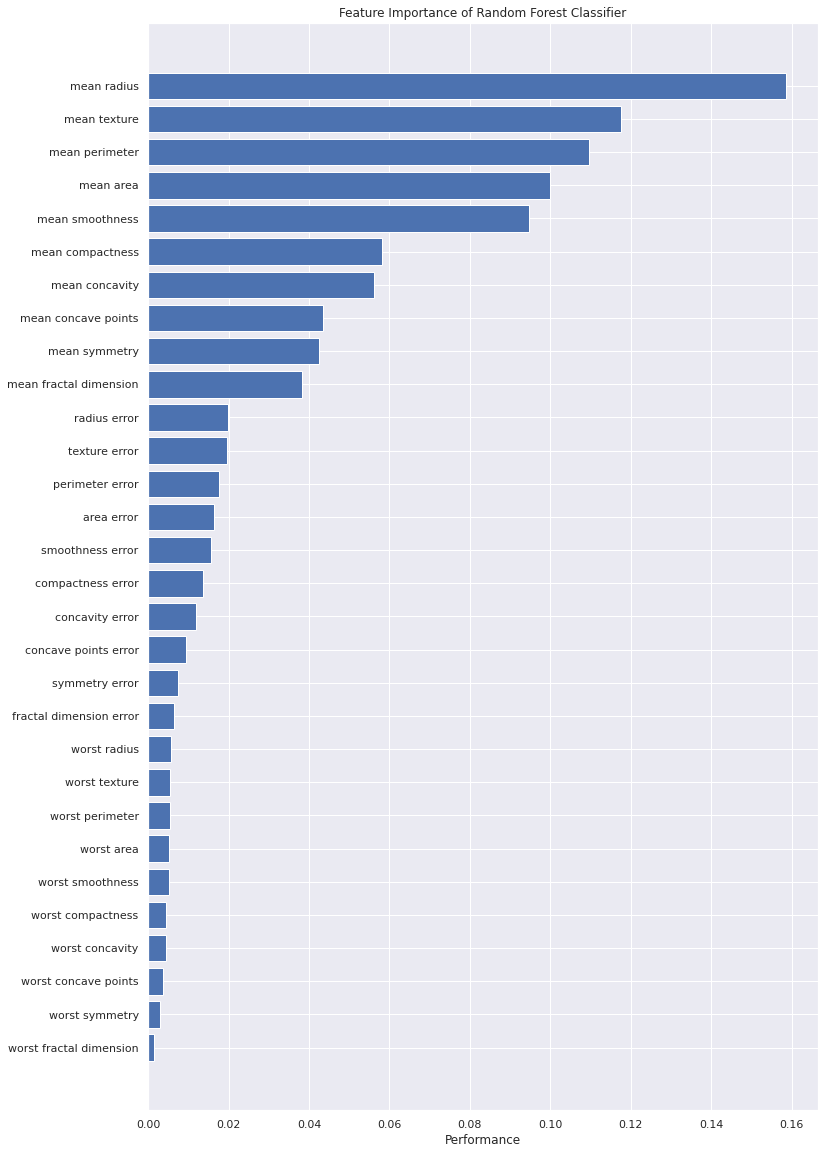

In [51]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12, 20))

# 6번에서 완성 코드를 기준으로 feature importance 불러오기
feature_importances = clf.feature_importances_
feature_importances = sorted(feature_importances, reverse=True)

ax.barh(y_pos, feature_importances, align='center')
ax.set_yticks(y_pos_sorted_idx)
ax.set_yticklabels(X.columns)
ax.invert_yaxis()
ax.set_xlabel('Performance')
ax.set_title('Feature Importance of Random Forest Classifier')

plt.show()